# Projectile Object

Velocity is 10.0 m/s
Initial height is 0 meters
Time of flight is 1.7347676341164493 seconds
Final velocity is 10.0 m/s
Final position is (4.787320135770234, 7.754382385111697, 10.000000000000002) meters
X values are: [0.0, 0.0, 0.275963191935415, 0.55192638387083, 0.8278895758062451, 1.10385276774166, 1.379815959677075, 1.6557791516124898, 1.9317423435479049, 2.2077055354833197, 2.483668727418735, 2.7596319193541494, 3.0355951112895645, 3.3115583032249796, 3.587521495160395, 3.86348468709581, 4.139447879031225, 4.41541107096664, 4.691374262902056]
Y values are: [0, 0.0, 0.44699833180027904, 0.8939966636005581, 1.3409949954008373, 1.7879933272011161, 2.234991659001395, 2.681989990801674, 3.1289883226019533, 3.575986654402232, 4.022984986202511, 4.4699833180027895, 4.916981649803069, 5.363979981603348, 5.810978313403628, 6.257976645203907, 6.704974977004187, 7.151973308804466, 7.598971640604746]
Z values are: [10.0, 10.0, 10.801853524534119, 11.505607049068237, 12.111260573602356, 12.61

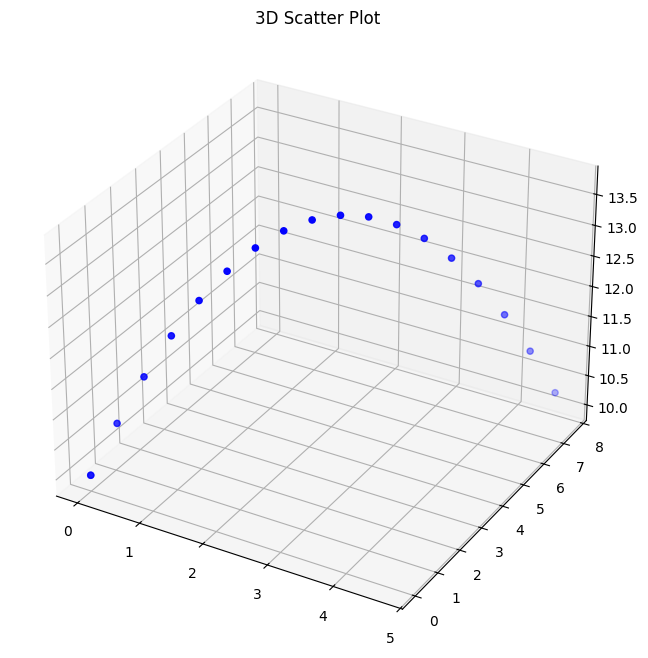

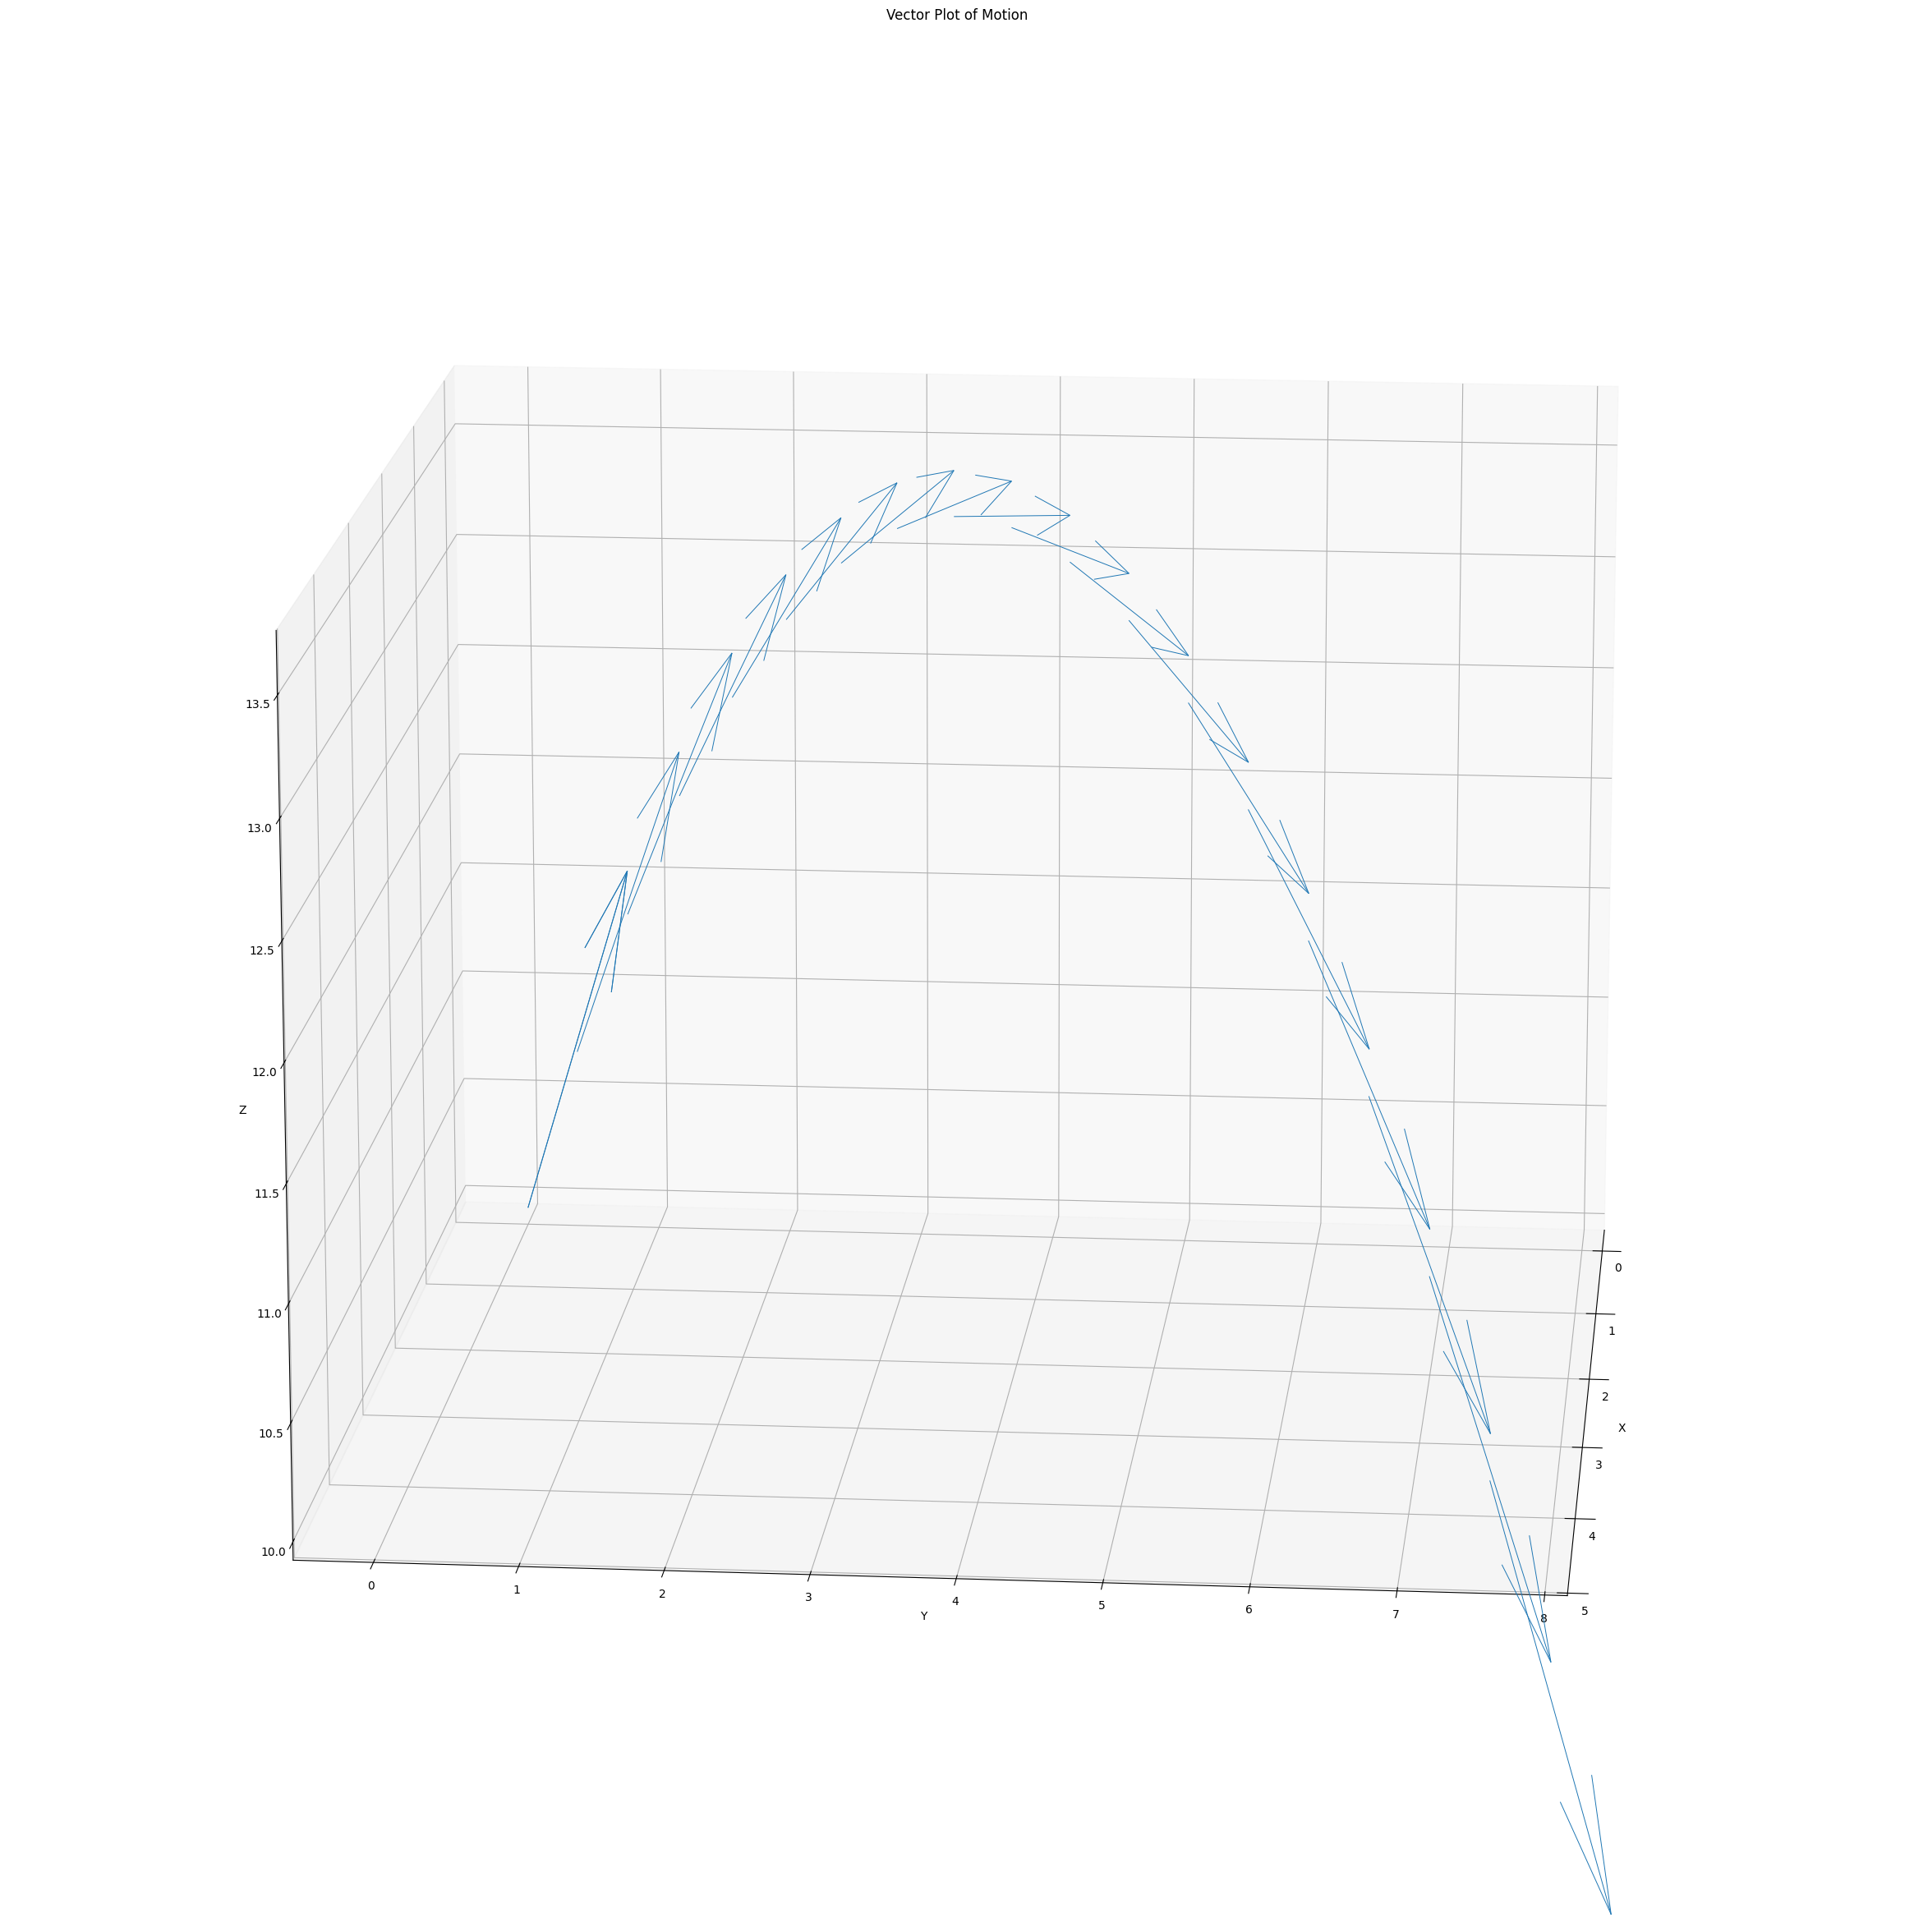

In [58]:

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import math

# Define symbols for mass and gravity
mass = 0.0
g = -9.81  # Acceleration due to gravity in m/s^2

# Initial variables
vVal = 0
thetaVal = 0
phiVal = 0
# v = speed, θ = elevation, φ = azimuth

# Initial Coordinates
xInitial = 0.0
yInitial = 0
zInitial = 0.0

# Current time during motion
time = 0.0
  

initialValues = [  
                {'name' :'vVal','value': vVal},
                {'name' :'thetaVal', 'value' :thetaVal},
                {'name' :'phiVal', 'value': phiVal},
                {'name' :'zInitial', 'value': zInitial}
                ] 


for var in initialValues:
     var['value'] =(float(input("Enter " + var['name'] + ": ")))
     globals()[var['name']] = var['value']

# Initial Velocity
vxI = vVal * math.cos(thetaVal) * math.cos(phiVal)
vyI = vVal * math.sin(phiVal) * math.cos(thetaVal)
vzI = vVal * math.sin(thetaVal)
                   
initialVelocity = math.sqrt(vxI**2 + vyI**2 + vzI**2)

# V(t)
vx = vxI 
vy = vyI
vz = vzI + (g * time)

velocityMag  = math.sqrt(vx**2 + vy**2 + vz**2)

# Time of flight calculation
timeOfFlight = 2 * vzI / (-1 * g) 

xValues = [xInitial]
yValues = [yInitial]
zValues = [zInitial]

# Calculate trajectory points
while time < timeOfFlight:
    xCoord = xInitial + vx * time
    yCoord = yInitial + vy * time
    zCoord = zInitial + vz * time + (0.5 * g * (time**2))
    xValues.append(xCoord)
    yValues.append(yCoord)
    zValues.append(zCoord)
    time += 0.1  # Increment time by 0.1 seconds


# Final Velocity
finalVelocity = math.sqrt(vx**2 + vy**2 + (vzI + g * timeOfFlight)**2)

# Calculate final position after time of flight
xFinal = xInitial + vxI*timeOfFlight
yFinal = yInitial + vyI*timeOfFlight
zFinal = zInitial + vzI*timeOfFlight + 0.5*g*timeOfFlight**2

# Determine direction of motion at given time
vTheta = math.atan(vz / math.sqrt(vx**2 + vy**2))
vPhi = math.atan2(vy, vx)

# List of vector components for quiver plot
U = [vxI] * len(xValues)
V = [vyI] * len(yValues)
W = [vzI]
time = 0.0  # Reset time for velocity vector calculation
vVectors = [[vxI, vyI, vzI]]
while time < timeOfFlight:
    vz = vzI + (g * time)
    W.append(vz)
    vVectors.append([vx, vy, vz])
    time += 0.1  # Increment time by 0.1 seconds
     
     


print("Velocity is " + str(velocityMag) + " m/s")
print("Initial height is " + str(yInitial) + " meters")
print("Time of flight is " + str(timeOfFlight) + " seconds")
print("Final velocity is " + str(finalVelocity) + " m/s")
print("Final position is (" + str(xFinal) + ", " + str(yFinal) + ", " + str(zFinal) + ") meters")

print("X values are: " + str(xValues))
print("Y values are: " + str(yValues))
print("Z values are: " + str(zValues))

print("Velocity vector components during flight:" + str(vVectors)) 

# Plotting the trajectory
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(xValues, yValues, zValues, c='blue', marker='o')
ax.set_title('3D Scatter Plot')
plt.show()




vectorPlot = plt.figure(figsize=(30, 30))
ax = plt.axes(projection='3d')
# Plot the quiver
ax.quiver(
    xValues, yValues, zValues,          # arrow bases
    U, V, W,          # arrow direction components
    length=0.2,       # scale factor for arrow lengths
    normalize=False,  # so arrow length = ‖(U,V,W)‖ × length
    linewidth=0.7,    # thickness of arrow shafts
    arrow_length_ratio=0.3,  # 30% of each arrow is head, 70% is shaft
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Vector Plot of Motion")
ax.view_init(elev=15, azim=5)  # rotate viewpoint

plt.show()

